# Recipe data - preproccesing

## Preprocceisng

In [ ]:
import pandas as pd
import numpy as np
import kagglehub
import re
import os

In [ ]:
# Download latest version
path = kagglehub.dataset_download("irkaal/foodcom-recipes-and-reviews")
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
recipes_file_path = os.path.join(path, csv_files[1])
reviews_file_path = os.path.join(path, csv_files[0])

100%|██████████| 723M/723M [00:20<00:00, 37.1MB/s]

Extracting files...


In [ ]:
df = pd.read_csv(recipes_file_path)
df.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,NaN,"c(""Mix everything together and bring to a boil..."


### Exploring the data

In [ ]:
df.shape

(522517, 28)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RecipeId                    522517 non-null  int64  
 1   Name                        522517 non-null  object 
 2   AuthorId                    522517 non-null  int64  
 3   AuthorName                  522517 non-null  object 
 4   CookTime                    439972 non-null  object 
 5   PrepTime                    522517 non-null  object 
 6   TotalTime                   522517 non-null  object 
 7   DatePublished               522517 non-null  object 
 8   Description                 522512 non-null  object 
 9   Images                      522516 non-null  object 
 10  RecipeCategory              521766 non-null  object 
 11  Keywords                    505280 non-null  object 
 12  RecipeIngredientQuantities  522514 non-null  object 
 13  RecipeIngredie

In [ ]:
df.describe()

,RecipeId,AuthorId,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings
count,522517.000000,5.225170e+05,269294.000000,275028.000000,522517.000000,522517.000000,522517.000000,522517.000000,5.225170e+05,522517.000000,522517.000000,522517.000000,522517.000000,339606.000000
mean,271821.436970,4.572585e+07,4.632014,5.227784,484.438580,24.614922,9.559457,86.487003,7.672639e+02,49.089092,3.843242,21.878254,17.469510,8.606191
std,155495.878422,2.929714e+08,0.641934,20.381347,1397.116649,111.485798,46.622621,301.987009,4.203621e+03,180.822062,8.603163,142.620191,40.128837,114.319809
min,38.000000,2.700000e+01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000
25%,137206.000000,6.947400e+04,4.500000,1.000000,174.200000,5.600000,1.500000,3.800000,1.233000e+02,12.800000,0.800000,2.500000,3.500000,4.000000
50%,271758.000000,2.389370e+05,5.000000,2.000000,317.100000,13.800000,4.700000,42.600000,3.533000e+02,28.200000,2.200000,6.400000,9.100000,6.000000
75%,406145.000000,5.658280e+05,5.000000,4.000000,529.100000,27.400000,10.800000,107.900000,7.922000e+02,51.100000,4.600000,17.900000,25.000000,8.000000
max,541383.000000,2.002886e+09,5.000000,3063.000000,612854.600000,64368.100000,26740.600000,130456.400000,1.246921e+06,108294.600000,3012.000000,90682.300000,18396.200000,32767.000000


In [ ]:
df.nunique()

,0
RecipeId,522517
Name,438188
AuthorId,57178
AuthorName,56793
CookTime,490
PrepTime,318
TotalTime,1240
DatePublished,245540
Description,492838
Images,165889


In [ ]:
df.isnull().sum()

,0
RecipeId,0
Name,0
AuthorId,0
AuthorName,0
CookTime,82545
PrepTime,0
TotalTime,0
DatePublished,0
Description,5
Images,1


In [ ]:
(df.isnull().sum()/(len(df)))*100

,0
RecipeId,0.000000
Name,0.000000
AuthorId,0.000000
AuthorName,0.000000
CookTime,15.797572
PrepTime,0.000000
TotalTime,0.000000
DatePublished,0.000000
Description,0.000957
Images,0.000191


#### Convert `RecipeServings` column to numeric

In [ ]:
df["RecipeServings"] = pd.to_numeric(df["RecipeServings"], errors='coerce')

In [ ]:
df["RecipeServings"].describe()

,RecipeServings
count,339606.000000
mean,8.606191
std,114.319809
min,1.000000
25%,4.000000
50%,6.000000
75%,8.000000
max,32767.000000


### Drop all rows in which `RecipeServings` is NAN

In [ ]:
df['RecipeServings'].isnull().sum()

182911

In [ ]:
df = df.dropna(subset=['RecipeServings'])

## Preprocessing - continuens

#### Drop all recipes with Description which starts with `'Make and share this'`

In [ ]:
df = df[df['Description'].str.startswith('Make and share this') == False]

### Make `RecipeId` the index

In [ ]:
df.index = df["RecipeId"]
df.drop("RecipeId", axis=1, inplace=True)

### Convert time columns from string type to time type

In [ ]:
time_cols = ['CookTime', 'PrepTime', 'TotalTime']
df[time_cols].head(3)

,CookTime,PrepTime,TotalTime
RecipeId,,,
40,PT5M,PT30M,PT35M
41,PT20M,PT24H,PT24H20M
44,PT3M,PT35M,PT38M


In [ ]:
def duration_to_hms(str_time):
    if pd.isnull(str_time):
        return None

    hours = re.findall('[0-9]*H', str_time)
    if hours:
        hours = int(hours[0][:-1])
    else:
        hours='00'

    minutes = re.findall('[0-9]*M', str_time)
    if minutes:
        minutes = minutes[0][:-1]
    else:
        minutes = '00'

    seconds = re.findall('[0-9]*S', str_time)
    if seconds:
        seconds = seconds[0][:-1]
    else:
        seconds='00'

    return f'{hours}:{minutes}:{seconds}'

In [ ]:
# Apply the function to the relevant columns
df[time_cols] = df[time_cols].applymap(duration_to_hms)
df.head(4)

<ipython-input-18-7e40f1fcfdb2>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[time_cols] = df[time_cols].applymap(duration_to_hms)


,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,RecipeCategory,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
RecipeId,,,,,,,,,,,,,,,,,,,,,
40,Best Lemonade,1566,Stephen Little,00:5:00,00:30:00,00:35:00,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",Beverages,...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."
41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,00:20:00,24:00:00,24:20:00,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",Soy/Tofu,...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
44,Warm Chicken A La King,1596,Joan Edington,00:3:00,00:35:00,00:38:00,1999-09-17T04:47:00Z,I copied this one out of a friend's book so ma...,"""https://img.sndimg.com/food/image/upload/w_55...",Chicken,...,31.9,405.8,557.2,29.1,3.1,5.0,45.3,2.0,NaN,"c(""Melt 1 1/2 ozs butter, add the flour and co..."
54,Carrot Cake,1535,Marg CaymanDesigns,00:50:00,00:45:00,1:35:00,1999-09-13T15:20:00Z,This is one of the few recipes my husband ever...,"c(""https://img.sndimg.com/food/image/upload/w_...",Dessert,...,4.9,69.8,534.8,67.0,1.6,47.9,5.0,12.0,1 bundt,"c(""Beat together the eggs, oil, and white suga..."


### Parse instructions

*   Cleans up and extracts useful text from a string that originally looked like a list.
*   Converts it into a multi-line readable format for better display.
*   Handles missing values (NaN) gracefully by returning None.


In [ ]:
import re

def parse_instructions(instructions):
    # Check if the value is NaN (missing) or not a string
    if pd.isnull(instructions) or not isinstance(instructions, str):
        return None

    # Ensure the string is properly formatted like an R vector
    match = re.match(r'^c\((.*)\)$', instructions)
    if match:
        instructions = match.group(1)  # Extract content inside c(...)

    # Remove surrounding quotes from each element
    instructions = [s.strip().strip('"') for s in instructions.split('", "')]

    # Join the list into a single string with each instruction on a new line
    return '\n'.join(instructions)


In [ ]:
df['RecipeInstructions'].isnull().sum()

0

In [ ]:
df['RecipeInstructions'].iloc[0]

'c("Into a 1 quart Jar with tight fitting lid, put sugar and lemon peel, or zest;  add 1 1/2 cups very hot water (not from tap!). With lid fitted firmly, shake jar until sugar is dissolved.", "Add lemon juice. Refrigerate until chilled.", "To Serve: Into each 12-ounce glass, over ice cubes, pour 1/4 cup of the lemon syrup.", "Then add chilled club soda or, if you prefer, water.", "Stir to mix well.")'

In [ ]:
df['RecipeInstructions'] = df['RecipeInstructions'].apply(parse_instructions)

In [ ]:
df['RecipeInstructions'].iloc[0]

'Into a 1 quart Jar with tight fitting lid, put sugar and lemon peel, or zest;  add 1 1/2 cups very hot water (not from tap!). With lid fitted firmly, shake jar until sugar is dissolved.\nAdd lemon juice. Refrigerate until chilled.\nTo Serve: Into each 12-ounce glass, over ice cubes, pour 1/4 cup of the lemon syrup.\nThen add chilled club soda or, if you prefer, water.\nStir to mix well.'

### Parse Ingredients

In [ ]:
df["RecipeIngredientParts"].head(2)

,RecipeIngredientParts
RecipeId,
40,"c(""sugar"", ""lemons, rind of"", ""lemon, zest of""..."
41,"c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""..."


In [ ]:
df["RecipeIngredientQuantities"].head(2)

,RecipeIngredientQuantities
RecipeId,
40,"c(""1 1/2"", ""1"", NA, ""1 1/2"", NA, ""3/4"")"
41,"c(""12"", ""1"", ""2"", ""1"", ""10"", ""1"", ""3"", ""2"", ""2..."


In [ ]:
# import re
# import ast

# def clean_column(series):
#     def parse_list(value):
#         """Convert a string representation of R-style c() list into a Python list"""
#         if not isinstance(value, str):
#             return None  # Return None if the value is not a string

#         # Remove 'c(' at the start and ')' at the end
#         value = re.sub(r'^c\(|\)$', '', value)

#         # Replace "NA" with None (Python's equivalent of missing values)
#         value = value.replace("NA", "None")

#         # Wrap in square brackets to make it a valid Python list
#         value = f"[{value}]"

#         try:
#             return ast.literal_eval(value)  # Safely evaluate the string as a Python list
#         except (SyntaxError, ValueError):
#             return None  # Return None if conversion fails

#     return series.apply(parse_list)

In [ ]:
# # Apply transformation
# df["RecipeIngredientQuantities"] = clean_column(df["RecipeIngredientQuantities"])

In [ ]:
import pandas as pd
import re

def clean_column_Ingredient(series):
    """Cleans an R-style character vector column in a Pandas Series."""
    def clean_entry(entry):
        # Return None for NaN or non-string values
        if pd.isnull(entry) or not isinstance(entry, str):
            return None

        # Extract content inside c(...) if present
        match = re.match(r'^c\((.*)\)$', entry)
        if match:
            entry = match.group(1)

        # Split elements and remove surrounding quotes
        return [s.strip().strip('"') for s in entry.split('", "')]

    return series.apply(clean_entry)

# Apply transformations
df["RecipeIngredientParts"] = clean_column_Ingredient(df["RecipeIngredientParts"]).apply(lambda x: [i.title() for i in x] if x else [])
df["RecipeIngredientQuantities"] = clean_column_Ingredient(df["RecipeIngredientQuantities"]).apply(lambda x: [i.title() for i in x] if x else [])


In [ ]:
df[["RecipeIngredientParts", "RecipeIngredientQuantities"]].head(3)

,RecipeIngredientParts,RecipeIngredientQuantities
RecipeId,,
40,"[Sugar, Lemons, Rind Of, Lemon, Zest Of, Fresh...","[1 1/2, 1"", Na, ""1 1/2"", Na, ""3/4]"
41,"[Extra Firm Tofu, Eggplant, Zucchini, Mushroom...","[12, 1, 2, 1, 10, 1, 3, 2, 2, 2, 1, 2, 1/2, 1/..."
44,"[Chicken, Butter, Flour, Milk, Celery, Button ...","[12, 2, 3, 450, 1, 2, 1/4, 1"", Na, Na, ""2, 2, ..."


### Parse `RecipeIngredientQuantities`

Adjust the quantities to be suitable for a single person.

In [ ]:
# df[["RecipeIngredientQuantities", "RecipeServings"]].head(3)

,RecipeIngredientQuantities,RecipeServings
RecipeId,,
40,"[1 1/2, 1, None, 1 1/2, None, 3/4]",4.0
41,"[12, 1, 2, 1, 10, 1, 3, 2, 2, 2, 1, 2, 1/2, 1/...",2.0
44,"[12, 2, 3, 450, 1, 2, 1/4, 1, None, None, 2, 2...",2.0


In [ ]:
# from fractions import Fraction

# def convert_to_float(value):
#     """Convert string fractions to float, handling whole numbers and invalid cases."""
#     if value is None or isinstance(value, float):
#         return value  # Return None or float as is

#     try:
#         value = str(value).strip()  # Ensure it's a string

#         # Split if it's a mixed fraction like "1 1/2"
#         parts = value.split()
#         if len(parts) == 2:  # Mixed fraction case: "1 1/2"
#             return float(parts[0]) + float(Fraction(parts[1]))
#         return float(Fraction(value))  # Handles "3/4", "2", etc.
#     except ValueError:
#         return None  # Return None if conversion fails

# def adjust_quantities(row):
#     """Divide each quantity by RecipeServings to adjust for a single serving."""
#     quantities = row["RecipeIngredientQuantities"]
#     servings = row["RecipeServings"]

#     if not isinstance(quantities, list) or not isinstance(servings, (int, float)) or servings == 0:
#         return None  # Handle missing/invalid values

#     return [convert_to_float(q) / servings if q is not None else None for q in quantities]

# # Convert ingredient quantities to lists of floats
# df["RecipeIngredientQuantities"] = df["RecipeIngredientQuantities"].apply(
#     lambda x: [convert_to_float(q) for q in x] if isinstance(x, list) else None
# )

# # Apply adjustment for single serving
# df["AdjustedIngredientQuantities"] = df.apply(adjust_quantities, axis=1)


In [ ]:
# df[["RecipeIngredientQuantities", "AdjustedIngredientQuantities", "RecipeServings"]].head(3)

,RecipeIngredientQuantities,AdjustedIngredientQuantities,RecipeServings
RecipeId,,,
40,"[1.5, 1.0, None, 1.5, None, 0.75]","[0.375, 0.25, None, 0.375, None, 0.1875]",4.0
41,"[12.0, 1.0, 2.0, 1.0, 10.0, 1.0, 3.0, 2.0, 2.0...","[6.0, 0.5, 1.0, 0.5, 5.0, 0.5, 1.5, 1.0, 1.0, ...",2.0
44,"[12.0, 2.0, 3.0, 450.0, 1.0, 2.0, 0.25, 1.0, N...","[6.0, 1.0, 1.5, 225.0, 0.5, 1.0, 0.125, 0.5, N...",2.0


#### Create a dictionary column mapping ingredients to their respective quantities


In [ ]:
# df["Ingredients"] = df.apply(
#     lambda row: dict(zip(
#         row["RecipeIngredientParts"] or [],  # Use original list or empty list if None
#         row["AdjustedIngredientQuantities"] or []  # Use original list or empty list if None
#     )),
#     axis=1
# )

# # df["Ingredients"] = df.apply(lambda row: dict(zip(row["RecipeIngredientParts"], row["AdjustedIngredientQuantities"])), axis=1)

In [ ]:
df["Ingredients"] = df.apply(lambda row: dict(zip(row["RecipeIngredientParts"], row["RecipeIngredientQuantities"])), axis=1)

In [ ]:
df["Ingredients"].head(3)

,Ingredients
RecipeId,
40,"{'Sugar': '1 1/2', 'Lemons, Rind Of': '1"", Na,..."
41,"{'Extra Firm Tofu': '12', 'Eggplant': '1', 'Zu..."
44,"{'Chicken': '12', 'Butter': '2', 'Flour': '3',..."


### Fix `RecipeYield` column
Converts the text to title case, meaning the first letter of each word is capitalized while the rest remain lowercase.

In [ ]:
df['RecipeYield'].head(3)

,RecipeYield
RecipeId,
40,NaN
41,4 kebabs
44,NaN


In [ ]:
def fix_recipe_yield(quantity):
    if pd.isnull(quantity):
        return None
    return quantity.title()

In [ ]:
df['RecipeYield'] = df['RecipeYield'].apply(fix_recipe_yield)

### Fix `Keywords` column
Converts the text to title case, meaning the first letter of each word is capitalized while the rest remain lowercase.

In [ ]:
df['Keywords'].head(3)

,Keywords
RecipeId,
40,"c(""Low Protein"", ""Low Cholesterol"", ""Healthy"",..."
41,"c(""Beans"", ""Vegetable"", ""Low Cholesterol"", ""We..."
44,"c(""Poultry"", ""Meat"", ""< 60 Mins"")"


### Drop all rows in which `Keywords` is NAN

In [ ]:
df['Keywords'].isnull().sum()

6372

In [ ]:
df = df.dropna(subset=['Keywords'])

In [ ]:
df['Keywords'].isnull().sum()

0

In [ ]:
# def fix_keywords(keywords: str):
#     if pd.isnull(keywords):
#         return None

#     keywords = keywords[3:-2]
#     keywords = keywords.split('", "')
#     return keywords

import re

def fix_keywords(keywords):
    """Cleans an R-style character vector representing keywords."""
    if pd.isnull(keywords) or not isinstance(keywords, str):
        return None

    # Extract content inside c(...) if present
    match = re.match(r'^c\((.*)\)$', keywords)
    if match:
        keywords = match.group(1)

    # Properly split the string while removing extra quotes
    return [s.strip().strip('"') for s in re.split(r'",\s*"', keywords.strip().strip('"'))]


In [ ]:
df['Keywords'] = df['Keywords'].apply(fix_keywords)

In [ ]:
df['Keywords'].head(3)

,Keywords
RecipeId,
40,"[Low Protein, Low Cholesterol, Healthy, Summer..."
41,"[Beans, Vegetable, Low Cholesterol, Weeknight,..."
44,"[Poultry, Meat, < 60 Mins]"


### Drop unnecessary columns


In [ ]:
columns_to_drop = ['AuthorId', 'AuthorName', 'DatePublished','Images', 'ReviewCount']
df = df.drop(columns=columns_to_drop)

In [ ]:
df[["ProteinContent", "SugarContent"]]

,ProteinContent,SugarContent
RecipeId,,
40,0.3,77.2
41,29.3,32.1
44,45.3,5.0
54,5.0,47.9
56,5.0,39.9
...,...,...
541367,23.2,20.2
541370,0.6,2.3
541376,0.6,15.4


### calculating the percentage of different macronutrients

*   Protein and carbohydrates provide 4 calories per gram.
*   Fat provides 9 calories per gram.
*   Sugar, being a carbohydrate, also provides 4 calories per gram.

In [ ]:
df['ProteinPercentage'] = (df['ProteinContent'] * 4 / df['Calories'])*100
df['CarbohydratePercentage'] = (df['CarbohydrateContent'] * 4 / df['Calories'])*100
df['SugarPercentage'] = (df['SugarContent'] * 4 / df['Calories'])*100
df['FatPercentage'] = (df['FatContent'] * 9 / df['Calories'])*100

### Data Filtering

Drop large recipes

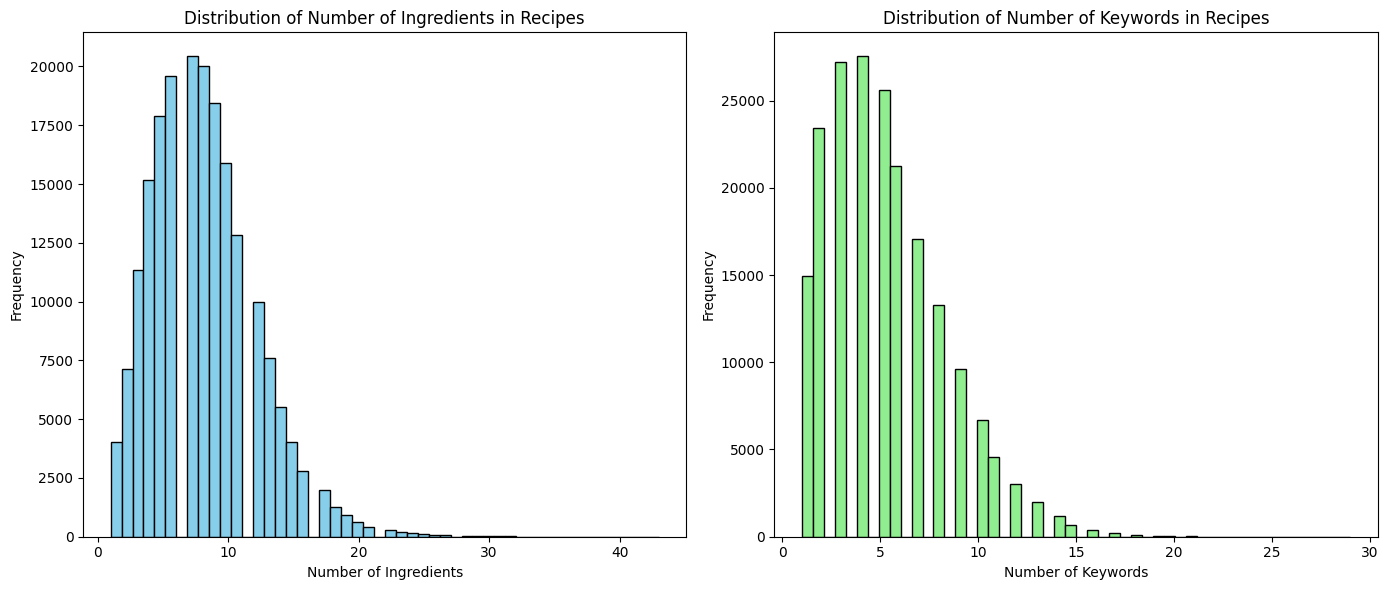

In [ ]:
import matplotlib.pyplot as plt

# Calculate the number of ingredients and keywords for each recipe
data_dist = pd.DataFrame()
data_dist['num_ingredients'] = df['RecipeIngredientParts'].apply(len)
data_dist['num_keywords'] = df['Keywords'].apply(len)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot the distribution of the number of ingredients
axs[0].hist(data_dist['num_ingredients'], bins=50, color='skyblue', edgecolor='black')
axs[0].set_title('Distribution of Number of Ingredients in Recipes')
axs[0].set_xlabel('Number of Ingredients')
axs[0].set_ylabel('Frequency')

# Plot the distribution of the number of keywords
axs[1].hist(data_dist['num_keywords'], bins=50, color='lightgreen', edgecolor='black')
axs[1].set_title('Distribution of Number of Keywords in Recipes')
axs[1].set_xlabel('Number of Keywords')
axs[1].set_ylabel('Frequency')

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
print(data_dist.describe())

       num_ingredients   num_keywords
count    198963.000000  198963.000000
mean          8.098455       5.236501
std           4.022282       3.036035
min           1.000000       1.000000
25%           5.000000       3.000000
50%           8.000000       5.000000
75%          10.000000       7.000000
max          43.000000      29.000000


#### Conclutions:

I seems that the median length for Number of Ingredients is 8 and median length forNumber of Keywords is 5.

Therefore, we will filter our data by these findings.

In [ ]:
df = df[(df['RecipeIngredientParts'].apply(len) <= 8) & (df['Keywords'].apply(len) <= 5)]

In [ ]:
df[['RecipeIngredientParts', 'Keywords']].head(3)

,RecipeIngredientParts,Keywords
RecipeId,,
40,"[Sugar, Lemons, Rind Of, Lemon, Zest Of, Fresh...","[Low Protein, Low Cholesterol, Healthy, Summer..."
56,"[Butter, Margarine, Sugar, Flour, Eggs, Salt, ...","[Dessert, Oven, < 4 Hours, Easy]"
76,"[Sweet Butter, Heavy Cream, Parmesan Cheese, S...","[European, Very Low Carbs, High In..., < 15 Mi..."


### Save new processed data

In [ ]:
df.shape

(68224, 27)

In [ ]:
df.head(4)

,Name,CookTime,PrepTime,TotalTime,Description,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,...,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions,Ingredients,ProteinPercentage,CarbohydratePercentage,SugarPercentage,FatPercentage
RecipeId,,,,,,,,,,,,,,,,,,,,,
40,Best Lemonade,00:5:00,00:30:00,00:35:00,This is from one of my first Good House Keepi...,Beverages,"[Low Protein, Low Cholesterol, Healthy, Summer...","[1 1/2, 1"", Na, ""1 1/2"", Na, ""3/4]","[Sugar, Lemons, Rind Of, Lemon, Zest Of, Fresh...",4.5,...,77.2,0.3,4.0,None,"Into a 1 quart Jar with tight fitting lid, put...","{'Sugar': '1 1/2', 'Lemons, Rind Of': '1"", Na,...",0.385728,104.789457,99.260688,0.578592
56,Buttermilk Pie,1:00:00,00:20:00,1:20:00,This recipe was originally noted by my wife on...,Pie,"[Dessert, Oven, < 4 Hours, Easy]","[1/2, 1 1/2, 3, 3, 1, 1, 1, 1]","[Butter, Margarine, Sugar, Flour, Eggs, Salt, ...",5.0,...,39.9,5.0,8.0,None,"c(""Preheat oven to 400°F.\nBeat the butter and...","{'Butter': '1/2', 'Margarine': '1 1/2', 'Sugar...",5.051781,52.740591,40.313210,43.420056
76,Alfredo Sauce,00:10:00,00:5:00,00:15:00,This is my son's favorite meal. I make it with...,Sauces,"[European, Very Low Carbs, High In..., < 15 Mi...","[1/4, 1, 3/4"", Na, ""1/4]","[Sweet Butter, Heavy Cream, Parmesan Cheese, S...",5.0,...,0.2,8.7,4.0,None,"c(""Place butter in microwave safe pot and heat...","{'Sweet Butter': '1/4', 'Heavy Cream': '1', 'P...",7.103491,2.041233,0.163299,92.590325
104,Cheeseburger Casserole,00:25:00,00:15:00,00:40:00,This is popular with the kids especially. My h...,Cheese,"[Meat, < 60 Mins, Oven]","[1 1/2, 1 -2, 1/4, 1, 1/2, 1, 1/8, 1, 1]","[Flour, Ground Beef, Onion, Tomato Sauce, Ketc...",4.5,...,12.6,25.5,6.0,None,Combine ground beef and flour in skillet. Add ...,"{'Flour': '1 1/2', 'Ground Beef': '1 -2', 'Oni...",18.767249,32.971481,9.273229,48.353266


In [ ]:
df.to_csv('recipes_final.csv', index=False)

In [ ]:
df.shape

(68224, 27)